In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 数据探索
## 1.1 数据特征分析
### 1.1.1 统计量分析总体分析

In [2]:
train = pd.read_csv('house-prices/train.csv',delimiter = ',')
test = pd.read_csv('house-prices/test.csv',delimiter = ',')
alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)
print(alldata.shape)
alldata.head()
alldata.tail()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [3]:
explore = train.describe(include = 'all').T
# print(expore)
explore['null'] = len(train) - explore['count']
explore.insert(0,'dtype',train.dtypes) 
explore.T.to_csv('explore1.csv')
explore

,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null
Id,int64,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460,0
MSSubClass,int64,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190,0
MSZoning,object,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
LotFrontage,float64,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313,259
LotArea,int64,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245,0
Street,object,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Alley,object,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1369
LotShape,object,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
LandContour,object,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Utilities,object,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
expore = alldata.describe(include = 'all').T
expore['null'] = len(alldata) - expore['count']

expore.insert(0,'dtype',alldata.dtypes)  #在列表头添加一列dtype
expore.T.to_csv('explore2.csv')
expore.T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
dtype,int64,object,float64,int64,object,object,object,object,object,object,...,int64,int64,object,object,object,int64,int64,int64,object,object
count,2919,2915,2433,2919,2919,198,2919,2919,2917,2919,...,2919,2919,10,571,105,2919,2919,2919,2918,2919
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,2133,...,NaN,NaN,4,329,95,NaN,NaN,NaN,2525,2402
mean,57.1377,NaN,69.3058,10168.1,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0624,2.2518,NaN,NaN,NaN,50.826,6.21309,2007.79,NaN,NaN
std,42.5176,NaN,23.3449,7887,NaN,NaN,NaN,NaN,NaN,NaN,...,56.1844,35.6639,NaN,NaN,NaN,567.402,2.71476,1.31496,NaN,NaN
min,20,NaN,21,1300,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,0,1,2006,NaN,NaN
25%,20,NaN,59,7478,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,0,4,2007,NaN,NaN
50%,50,NaN,68,9453,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,0,6,2008,NaN,NaN


### 1.1.2 相关性分析

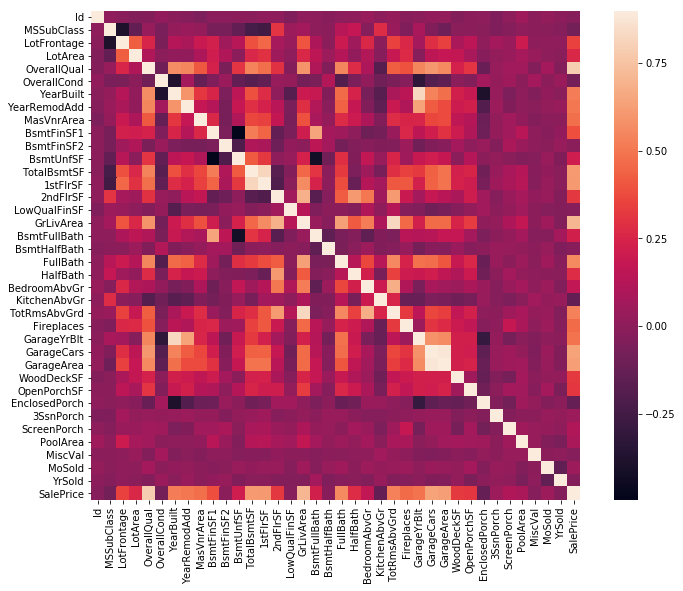

In [5]:
corrmat = train.corr()  #相关系数矩阵，即给出了任意两个变量之间的相关系数
# print(corrmat)

plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = 0.9,square=True)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749 0.40951598 0.28198586]
 [0.56066376 0.55059971 0.63001

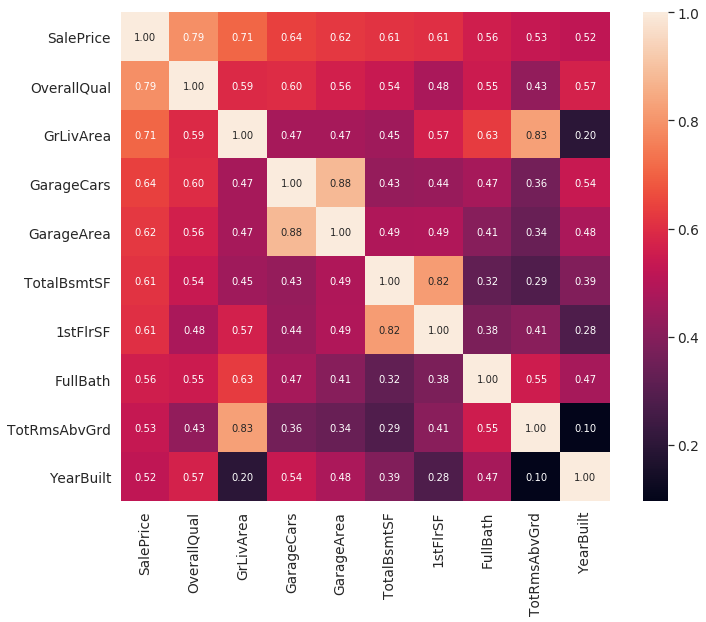

In [6]:
#查看影响最终价格的十个变量
k = 10 
plt.figure(figsize=(12,9))
# k代表的是行数
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].T)
print(cm)
# print(train[cols].corr())
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
# 找出对房价相关系数大于0.5的所有行
Corr = train.corr()
Corr[Corr['SalePrice']>0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


## OverallQual   总体材料和加工质量
## YearBuilt     原始施工日期
YearRemodAdd  改型日期
## TotalBsmtSF   地下室总平方英尺
1stFlrSF         一楼平方英尺
## GrLivArea     地面（地面）以上居住级平方英尺
## FullBath      满级浴室
TotRmsAbvGrd  等客房总数（不包括浴室）
## GarageCars    车库中车库的大小
GarageArea    车库的大小

In [8]:
train.YearRemodAdd.unique()
train['TotRmsAbvGrd'].unique()


array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

/home/tarena/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


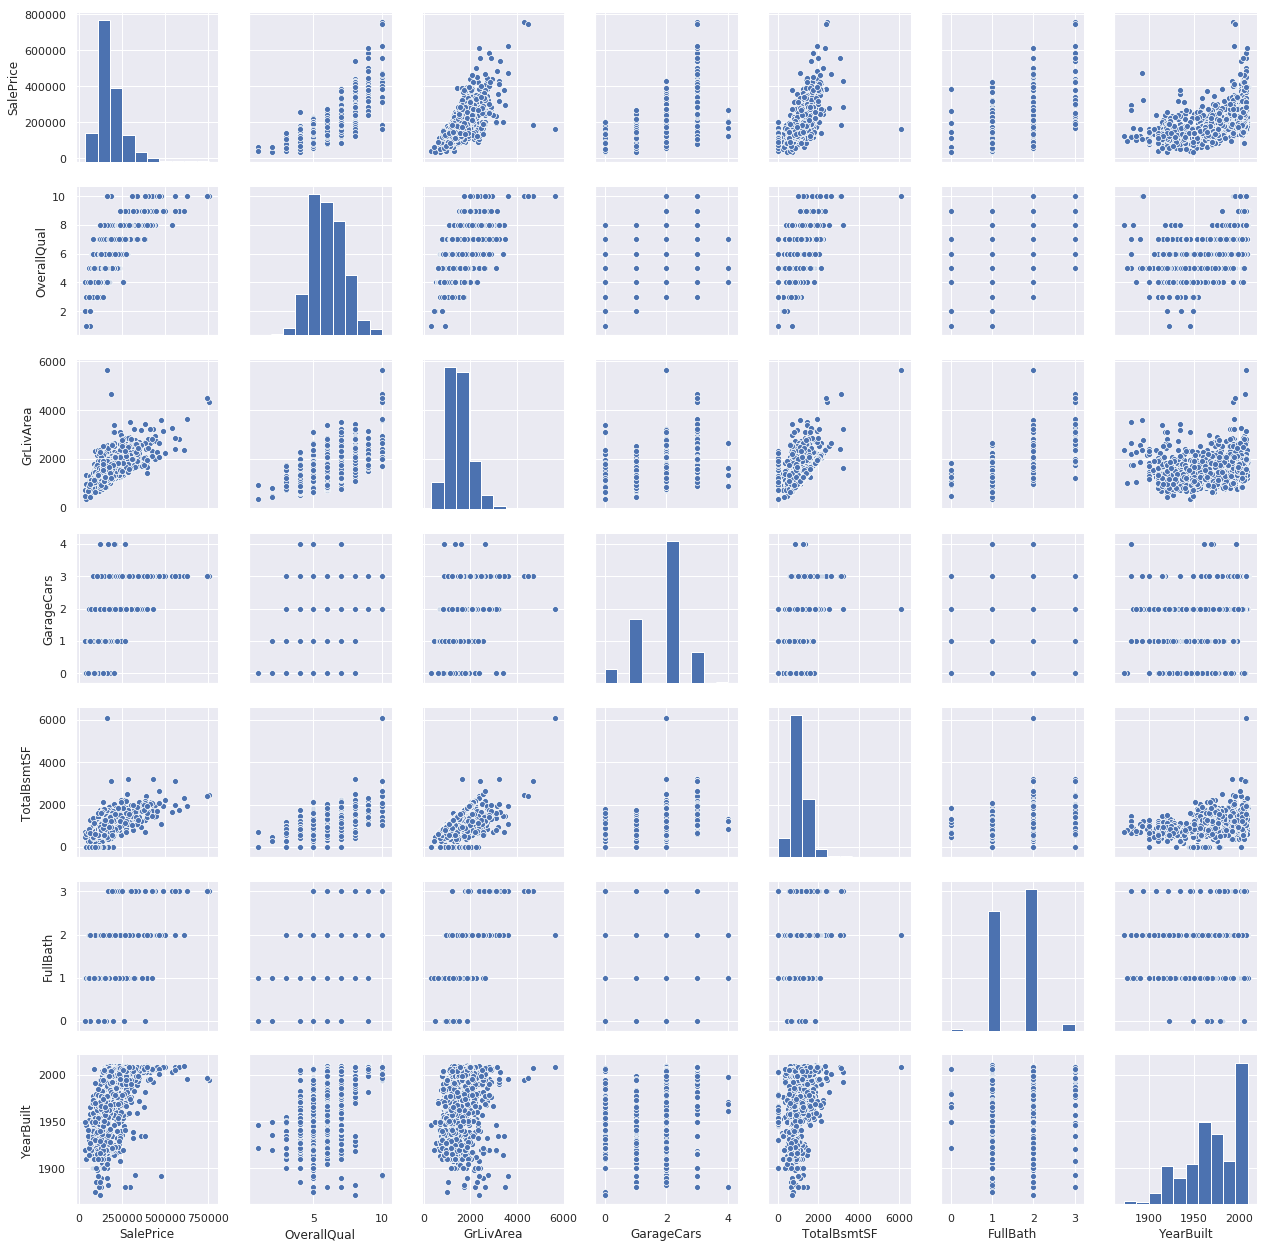

In [9]:
#scatterplot 绘制散点图矩阵注意：多变量作图数据中不能有空值，否则出错
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

### 1.1.3 分布分析

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

####  查看是否符合正态分布

/home/tarena/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


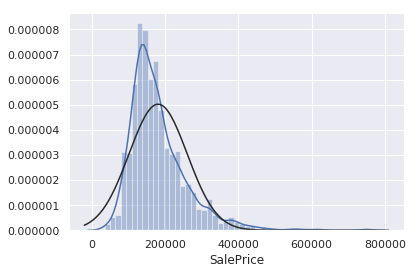

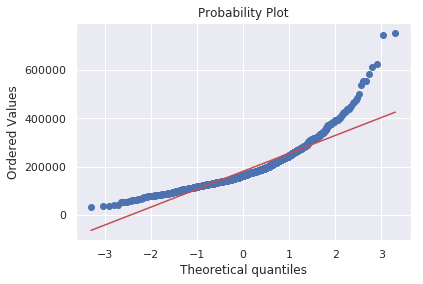

In [11]:
from scipy import stats,integrate
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [12]:
# 查看正态分布的偏度和峰度
print("Skewness: %f" %train['SalePrice'].skew()) #偏度
print("Kurtosis: %f" %train['SalePrice'].kurt()) #峰度

Skewness: 1.882876
Kurtosis: 6.536282


/home/tarena/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


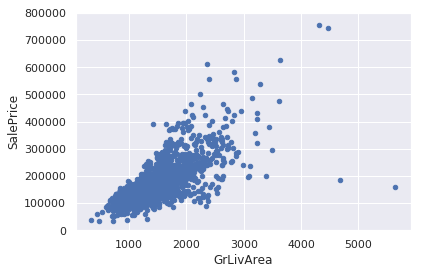

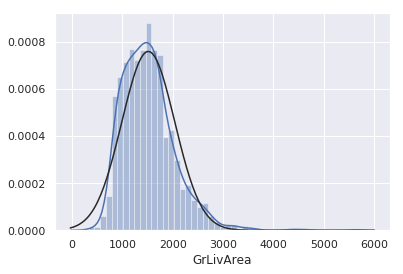

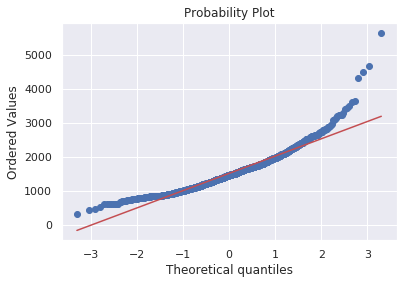

In [13]:
#研究SalePrice和 GrLivArea之间的关系
data1 = pd.concat((train['SalePrice'],train['GrLivArea']),axis = 1)
data1.plot.scatter(x = 'GrLivArea',y = 'SalePrice',ylim=(0,800000))


# 直方图和正态概率图，查看是否正态分布
fig = plt.figure()
sns.distplot(train['GrLivArea'],fit = norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
# 由散点图可知，图像的右下角存在两个异常值，建议去除；图像非正态分布

/home/tarena/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


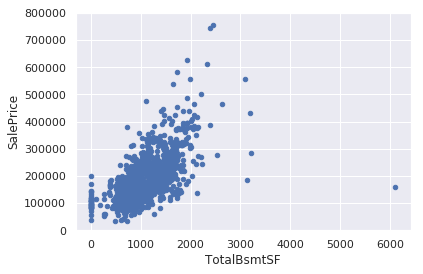

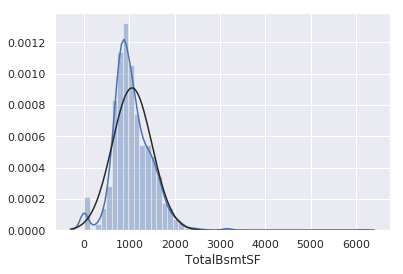

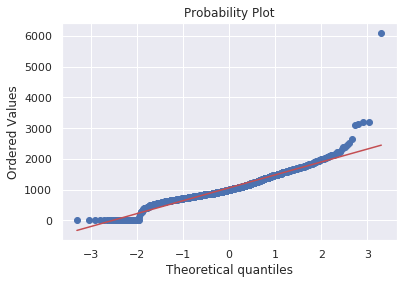

In [14]:
#研究SalePrice和 TotalBsmtSF之间的关系
data1 = pd.concat((train['SalePrice'],train['TotalBsmtSF']),axis = 1)
# print(data2)
data1.plot.scatter(x = 'TotalBsmtSF',y = 'SalePrice',ylim = (0,800000))


#绘制直方图和正太概率图
fig = plt.figure()
sns.distplot(train['TotalBsmtSF'],fit = norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'],plot = plt)
# 由图可以看出，散点图的右下方有一个异常值，建议去掉，同时非正态分布

(-0.5, 9.5, -1105.0, 791005.0)

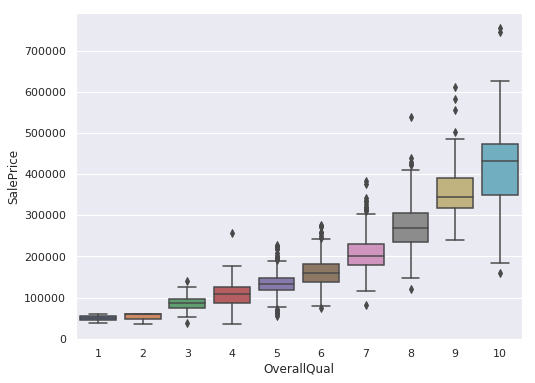

In [15]:
# 研究SalePrice和OverallQual的关系
data2 = pd.concat((train['SalePrice'],train['OverallQual']),axis = 1)
f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = 'OverallQual',y = 'SalePrice',data = data2)
fig.axis(ylim = (0,800000))

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: SalePrice, dtype: int64


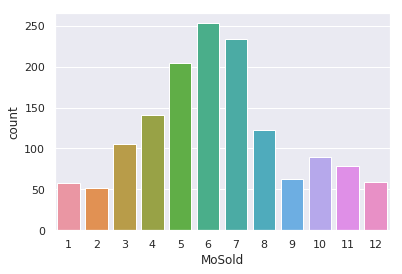

In [16]:
# 查看不同月份卖出去的房价
print(train.groupby('MoSold')['SalePrice'].count())
sns.countplot(x='MoSold',data=train)

## 1.2 数据质量分析
### 1.2.1 缺失值

In [17]:
def missing_values(alldata):
    # 缺失值
    alldata_na = pd.DataFrame(alldata.isnull().sum(),columns = {'MissingNum'})
    # 缺失值率
    alldata_na['MissingRate'] = (alldata_na['MissingNum']/len(alldata))*100
    # 存在值
    alldata_na['existNum'] = len(alldata) - alldata_na['MissingNum']
    
    #训练集的存在值
    alldata_na['train_notna'] = len(train) - train.isnull().sum()
    #测试集的存在值
    alldata_na['test_notna']  = len(test) - test.isnull().sum()
    alldata_na['dtype'] = alldata.dtypes
    
    alldata_na = alldata_na[alldata_na['MissingNum'] > 0].reset_index().sort_values(by='MissingNum',ascending=False)
    alldata_na.set_index('index',inplace = True)
    
    
    return alldata_na
alldata_na = missing_values(alldata)
alldata_na

,MissingNum,MissingRate,existNum,train_notna,test_notna,dtype
index,,,,,,
PoolQC,2909,99.657417,10,7,3,object
MiscFeature,2814,96.402878,105,54,51,object
Alley,2721,93.216855,198,91,107,object
Fence,2348,80.438506,571,281,290,object
FireplaceQu,1420,48.646797,1499,770,729,object
LotFrontage,486,16.649538,2433,1201,1232,float64
GarageFinish,159,5.447071,2760,1379,1381,object
GarageQual,159,5.447071,2760,1379,1381,object
GarageCond,159,5.447071,2760,1379,1381,object


In [18]:
alldata.PoolArea.unique()

array([  0, 512, 648, 576, 555, 480, 519, 738, 144, 368, 444, 228, 561,
       800])

####  1. 对于pool相关空值

In [19]:
# 查看各个poolQC的分布情况
alldata['PoolQC'].value_counts()
poolqc = alldata.groupby('PoolQC')['PoolArea'].mean()
print('不同poolqc的PoolArea的均值',poolqc)
#查看有PoolArea的数据(非0的数据)但是没有PoolQC的数据
poolqcna = alldata[(alldata['PoolQC'].isnull()) & (alldata['PoolArea'] != 0)][['PoolQC','PoolArea']]

print('查看有PoolArea的数据但是没有PoolQC的数据',poolqcna)

#查看所有PoolArea为0，但是PoolQC不为空的数据0
poolareana = alldata[(alldata['PoolArea'] == 0) & (alldata['PoolQC'].notnull())][['PoolQC','PoolArea']]

print('查看所有PoolArea为0，但是PoolQC不为空的数据',poolareana)

不同poolqc的PoolArea的均值 PoolQC
Ex    359.75
Fa    583.50
Gd    648.50
Name: PoolArea, dtype: float64
查看有PoolArea的数据但是没有PoolQC的数据      PoolQC  PoolArea
2420    NaN       368
2503    NaN       444
2599    NaN       561
查看所有PoolArea为0，但是PoolQC不为空的数据 Empty DataFrame
Columns: [PoolQC, PoolArea]
Index: []


#### 2. 对于Garage*相关空值

In [20]:
a = pd.Series(alldata.columns)
# 找出所有和Garage相关的列
GarageList = a[a.str.contains('Garage')].values
# print(GarageList)


#
print(alldata_na.loc[GarageList,:])
# 检查GarageArea、GarageCars均为0的，其他类别列的空值均填充“none”，数值列填“0”
print(len(alldata[(alldata['GarageArea']==0) & (alldata['GarageCars']==0)]))
print(len(alldata[(alldata['GarageArea']!=0) & (alldata['GarageCars'].isnull==True)])) 


              MissingNum  MissingRate  existNum  train_notna  test_notna  \
index                                                                      
GarageType           157     5.378554      2762         1379        1383   
GarageYrBlt          159     5.447071      2760         1379        1381   
GarageFinish         159     5.447071      2760         1379        1381   
GarageCars             1     0.034258      2918         1460        1458   
GarageArea             1     0.034258      2918         1460        1458   
GarageQual           159     5.447071      2760         1379        1381   
GarageCond           159     5.447071      2760         1379        1381   

                dtype  
index                  
GarageType     object  
GarageYrBlt   float64  
GarageFinish   object  
GarageCars    float64  
GarageArea    float64  
GarageQual     object  
GarageCond     object  
157
0


#### 3.对于Bsmt*相关空值

In [21]:
# 找出所有Bsmt*相关属性
b = pd.Series(alldata.columns)
BsmtList = b[b.str.contains('Bsmt')].values
# print(BsmtList)
allBsmtna = alldata_na.loc[BsmtList,:]
allBsmtna

,MissingNum,MissingRate,existNum,train_notna,test_notna,dtype
index,,,,,,
BsmtQual,81,2.774923,2838,1423,1415,object
BsmtCond,82,2.809181,2837,1423,1414,object
BsmtExposure,82,2.809181,2837,1422,1415,object
BsmtFinType1,79,2.706406,2840,1423,1417,object
BsmtFinSF1,1,0.034258,2918,1460,1458,float64
BsmtFinType2,80,2.740665,2839,1422,1417,object
BsmtFinSF2,1,0.034258,2918,1460,1458,float64
BsmtUnfSF,1,0.034258,2918,1460,1458,float64
TotalBsmtSF,1,0.034258,2918,1460,1458,float64


In [22]:
condition = (alldata['BsmtExposure'].isnull()) & (alldata['BsmtCond'].notnull())
alldata[condition][BsmtList]
#可以看出，当'BsmtExposure为空值时，有三行数据不为空，因此BsmtExposure这行可填充众数

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1487,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2348,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [23]:
condition2 = (alldata['BsmtCond'].isnull()) & (alldata['BsmtExposure'].notnull())
alldata[condition2][BsmtList]
len(alldata[alldata['BsmtCond'] == alldata['BsmtQual']])
# 当‘BsmtCond’为空值时，其他有三行数据不为空，
# 因为‘BsmtCond’和‘BsmtQual’有1265个值相等，所以BsmtCond空值的取值与BsmtExposure的取值对应填充

1265

In [24]:
condition3 = (alldata['BsmtQual'].isnull()) & (alldata['BsmtExposure'].notnull())
alldata[condition3][BsmtList]
# 通过研究发现，BsmtQual为空时，有两行数据其他值不为空，填充方法与condition2类似

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2217,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2218,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [25]:
# Garage*其他相关字段可考虑数值型填充0，标称型填充none
print(alldata['BsmtFinType1'].value_counts().head(5))
print(alldata['BsmtFinType1'].value_counts().head(5))


print(alldata['BsmtFinSF1'].value_counts().head(5))
print(alldata['BsmtFinSF2'].value_counts().head(5))
print(alldata['BsmtUnfSF'].value_counts().head(5))
print(alldata['TotalBsmtSF'].value_counts().head(5))
print(alldata['BsmtFullBath'].value_counts().head(5))
print(alldata['BsmtHalfBath'].value_counts().head(5))

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
Name: BsmtFinType1, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
Name: BsmtFinType1, dtype: int64
0.0      929
24.0      27
16.0      14
300.0      9
288.0      8
Name: BsmtFinSF1, dtype: int64
0.0      2571
294.0       5
180.0       5
162.0       3
539.0       3
Name: BsmtFinSF2, dtype: int64
0.0      241
384.0     19
728.0     14
672.0     13
600.0     12
Name: BsmtUnfSF, dtype: int64
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
Name: TotalBsmtSF, dtype: int64
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64


####  4.MasVnrType	砖石类型 MasVnrArea	砖石面积

In [26]:
print(alldata[['MasVnrType','MasVnrArea']].isnull().sum())
print(len(alldata[(alldata['MasVnrType'].isnull()) & (alldata['MasVnrArea'].isnull())]))
print(len(alldata[(alldata['MasVnrType'].isnull()) & (alldata['MasVnrArea'].notnull())]))
print(len(alldata[(alldata['MasVnrType'].notnull()) & (alldata['MasVnrArea'].isnull())]))

print(alldata['MasVnrType'].value_counts())

MasVnrM = alldata.groupby('MasVnrType')['MasVnrArea'].median()
print(MasVnrM)
mtypena = alldata[(alldata['MasVnrType'].isnull()) & (alldata['MasVnrArea'].notnull())][['MasVnrType','MasVnrArea']]
print(mtypena)

MasVnrType    24
MasVnrArea    23
dtype: int64
23
1
0
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64
MasVnrType
BrkCmn     161.0
BrkFace    203.0
None         0.0
Stone      200.0
Name: MasVnrArea, dtype: float64
     MasVnrType  MasVnrArea
2610        NaN       198.0


In [27]:
alldata[alldata['MasVnrType']=='None'][['MasVnrArea']]['MasVnrArea'].value_counts()

0.0      1735
1.0         3
285.0       1
312.0       1
344.0       1
288.0       1
Name: MasVnrArea, dtype: int64

#### 5. MS**

In [28]:
print(alldata[(alldata['MSSubClass'].isnull()) | (alldata['MSZoning'].isnull())][['MSSubClass','MSZoning']])
pd.crosstab(alldata.MSSubClass,alldata.MSZoning)

#通过观察30/70 'RM'和20   'RL'的组合较多。对应填充

      MSSubClass MSZoning
1915          30      NaN
2216          20      NaN
2250          70      NaN
2904          20      NaN


MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,3,34,4,1016,20
30,8,0,2,61,67
40,0,0,0,4,2
45,0,0,1,6,11
50,7,0,2,159,119
60,0,43,0,529,3
70,4,0,3,57,63
75,0,0,0,9,14
80,0,0,0,115,3


####  6. LotFrontage和Neighborhood的关系

In [29]:
#考虑到LotFrontage	与街道连接的线性脚与Neighborhood	房屋附近位置 存在一定的关系
 
print(alldata[["LotFrontage", "Neighborhood"]].isnull().sum())
print(alldata["LotFrontage"].value_counts().head(5))
 
# 考虑通过一定的方式来填充
# 例如：
# alldata["LotFrontage"] = alldata.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

LotFrontage     486
Neighborhood      0
dtype: int64
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64


In [30]:
alldata['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

#### 7.其他特征

In [31]:
others = ['Functional','Utilities','SaleType','Electrical', "FireplaceQu",'Alley',"Fence", "MiscFeature",\
          'KitchenQual','Exterior1st','Exterior2nd']
print(alldata[others].isnull().sum())
print(alldata['Functional'].value_counts().head(5)) # 填众数
print(alldata['Utilities'].value_counts().head(5)) # 填众数
print(alldata['SaleType'].value_counts().head(5)) # 填众数
print(alldata['Electrical'].value_counts().head(5)) # 填众数
print(alldata["Fence"].value_counts()) # 填众数
print(alldata["MiscFeature"].value_counts().head(5)) # 填众数
print(alldata['KitchenQual'].value_counts().head(5)) # 填众数
print(alldata['Exterior1st'].value_counts().head(5)) # 填众数
print(alldata['Exterior2nd'].value_counts().head(5)) # 填众数
print(alldata['FireplaceQu'].value_counts().head(5)) # 填'none'
print(alldata['Alley'].value_counts().head(5)) # 填'none'

Functional        2
Utilities         2
SaleType          1
Electrical        1
FireplaceQu    1420
Alley          2721
Fence          2348
MiscFeature    2814
KitchenQual       1
Exterior1st       1
Exterior2nd       1
dtype: int64
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Name: Functional, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
WD       2525
New       239
COD        87
ConLD      26
CWD        12
Name: SaleType, dtype: int64
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywo

### 1.2.2 异常值处理
#### 由查看是否符合正态分布所做的直方图可知，存在异常值，建议去除

### 1.2.3 重复值处理

In [32]:
alldata[alldata.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2713,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2865,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


## 2.数据预处理
### 2.1 数据清洗
#### 2.1.1缺失值处理


#### 1. 关于PoolQC和PoolArea

In [33]:
alldata['PoolArea'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [34]:
poolqcna = alldata[(alldata['PoolQC'].isnull())& (alldata['PoolArea']!=0)][['PoolQC','PoolArea']]
print(poolqcna)
print(poolqcna.index)
areamean = alldata.groupby('PoolQC')['PoolArea'].mean()
print(areamean)
# v = alldata.loc[2420,['PoolArea']].values
# print(v)
# print((np.abs(v-areamean)))
for i in poolqcna.index:
    v = alldata.loc[i,['PoolArea']].values
    # np.abs 返回数据的绝对值                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
    print(type(np.abs(v-areamean)))
    # numpy.argmin表示最小值在数组中所在的位置
    alldata.loc[i,['PoolQC']] = np.abs(v-areamean).astype('float64').argmin()
    


alldata['PoolQC'] = alldata["PoolQC"].fillna("None")
alldata['PoolArea'] = alldata["PoolArea"].fillna(0)  #因为PoolArea的大部分值都为0，所以空值填充0


     PoolQC  PoolArea
2420    NaN       368
2503    NaN       444
2599    NaN       561
Int64Index([2420, 2503, 2599], dtype='int64')
PoolQC
Ex    359.75
Fa    583.50
Gd    648.50
Name: PoolArea, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


/home/tarena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


#### 2. 关于Garage*相关空值

In [35]:
print(alldata.GarageCars.value_counts())
print(alldata.GarageArea.value_counts())
print(alldata.Electrical.value_counts())

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64
0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
528.0      65
400.0      58
480.0      54
264.0      51
288.0      50
308.0      48
280.0      30
336.0      29
420.0      29
672.0      23
216.0      23
462.0      23
506.0      21
384.0      21
504.0      21
286.0      20
312.0      19
550.0      17
624.0      17
495.0      17
352.0      17
525.0      17
360.0      16
180.0      16
564.0      16
         ... 
958.0       1
808.0       1
363.0       1
752.0       1
954.0       1
284.0       1
209.0       1
604.0       1
892.0       1
413.0       1
258.0       1
1041.0      1
639.0       1
859.0       1
741.0       1
535.0       1
609.0       1
1184.0      1
853.0       1
1110.0      1
713.0       1
611.0       1
963.0       1
186.0       1
265.0       1
443.0       1
424.0       1
263.0       1
962.0       1
803.0       1
Name: GarageArea, Length: 603, dtype: int64

In [36]:
alldata[['GarageCond','GarageFinish','GarageQual','GarageType']] = alldata[['GarageCond','GarageFinish','GarageQual','GarageType']].fillna('None')
alldata[['GarageCars','GarageArea']] = alldata[['GarageCars','GarageArea']].fillna(0)
# .mode()[0] 求中位数
alldata['Electrical'] = alldata['Electrical'].fillna(alldata['Electrical'].mode()[0])

#### 3. Bsmt相关空值

In [37]:
alldata.BsmtExposure.value_counts()
(alldata['BsmtExposure'].isnull() == True).sum()  # 82
alldata.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [38]:
a = pd.Series(alldata.columns)
BsmtList = a[a.str.contains('Bsmt')].values
# print(BsmtList)
allBsmtna = alldata_na.loc[BsmtList,:]
condition = (alldata['BsmtExposure'].isnull()) & (alldata['BsmtCond'].notnull())
alldata.ix[(condition),'BsmtExposure'] = alldata['BsmtExposure'].mode()[0]


print(len(alldata[alldata['BsmtCond'] == alldata['BsmtQual']]))
# 由于BsmtCond和BsmtQual有1265个相同值，所以填充
condition1 = (alldata['BsmtCond'].isnull()) & (alldata['BsmtExposure'].notnull()) # 3个
alldata.ix[(condition1),'BsmtCond'] = alldata.ix[(condition1),'BsmtQual'] 
# 由于BsmtCond和BsmtQual有1265个相同值，所以对应填充


condition2 = (alldata['BsmtQual'].isnull()) & (alldata['BsmtExposure'].notnull())
alldata.ix[(condition2),'BsmtQual'] = alldata.ix[(condition2),'BsmtCond']
# 由于BsmtCond和BsmtQual有1265个相同值，所以对应填充



1265


/home/tarena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/tarena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/home/tarena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [39]:
#### BsmtFinType1和BsmtFinType2
a = pd.Series(alldata.columns)
BsmtList = a[a.str.contains('Bsmt')].values
# print(BsmtList)
# print(alldata.BsmtFinType1.value_counts())
# print(alldata.BsmtFinType2.value_counts())

condition3 = alldata['BsmtFinType1'].notnull() & alldata['BsmtFinType2'].isnull()
# alldata.loc[condition3,'BsmtFinType2'] = alldata['BsmtFinType2'].fillna(alldata['BsmtFinType2'].mode()[0])
alldata.loc[condition3,'BsmtFinType2'] = alldata['BsmtFinType2'].mode()[0]
print(alldata[condition3]['BsmtFinType2'])

#### 再将剩下的普通‘Bsmt’进行填充
# print(alldata_na)
allBsmtNa = alldata_na.loc[BsmtList,:]
print(allBsmtNa)
allBsmtNa_obj = allBsmtNa[allBsmtNa['dtype']=='object'].index
print(allBsmtNa_obj)
allBsmtNa_flo = allBsmtNa[allBsmtNa['dtype']!='object'].index
alldata[allBsmtNa_obj] =alldata[allBsmtNa_obj].fillna('None')
alldata[allBsmtNa_flo] = alldata[allBsmtNa_flo].fillna(0)



332    Unf
Name: BsmtFinType2, dtype: object
              MissingNum  MissingRate  existNum  train_notna  test_notna  \
index                                                                      
BsmtQual              81     2.774923      2838         1423        1415   
BsmtCond              82     2.809181      2837         1423        1414   
BsmtExposure          82     2.809181      2837         1422        1415   
BsmtFinType1          79     2.706406      2840         1423        1417   
BsmtFinSF1             1     0.034258      2918         1460        1458   
BsmtFinType2          80     2.740665      2839         1422        1417   
BsmtFinSF2             1     0.034258      2918         1460        1458   
BsmtUnfSF              1     0.034258      2918         1460        1458   
TotalBsmtSF            1     0.034258      2918         1460        1458   
BsmtFullBath           2     0.068517      2917         1460        1457   
BsmtHalfBath           2     0.068517      

#### 4.MasVnrType 砖石类型 MasVnrArea 砖石面积相关空值

In [40]:
mtypena = alldata[alldata['MasVnrType'].isnull() & alldata['MasVnrArea'].notnull()][['MasVnrType','MasVnrArea']]
print(mtypena)
MasVnrM = alldata.groupby('MasVnrType')['MasVnrArea'].mean()
print(MasVnrM)
v = alldata.loc[mtypena.index,'MasVnrArea'].values
print(v)
alldata.loc[mtypena.index,'MasVnrType'] = np.abs(v - MasVnrM).astype('float64').argmin()
print(alldata.loc[mtypena.index,'MasVnrType'])


# 其他普通的MasVnrType和MasVnrArea分别设置成None和0
alldata['MasVnrType'] = alldata['MasVnrType'].fillna('None')
alldata['MasVnrArea'] = alldata['MasVnrArea'].fillna(0)

     MasVnrType  MasVnrArea
2610        NaN       198.0
MasVnrType
BrkCmn     195.480000
BrkFace    261.672355
None         0.707233
Stone      239.550201
Name: MasVnrArea, dtype: float64
[198.]
2610    BrkCmn
Name: MasVnrType, dtype: object


/home/tarena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


#### 5. MS相关空值填充

In [41]:
alldata['MSSubClass'].isnull().sum()

0

In [42]:
alldata['MSZoning'].isnull().sum()

4

In [43]:
alldata['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [44]:
alldata['MSZoning'] = alldata['MSZoning'].fillna(alldata['MSZoning'].mode()[0])

#### 6 . LotFrontage相关空值

In [45]:
alldata.LotFrontage.unique()
# alldata.Neighborhood.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

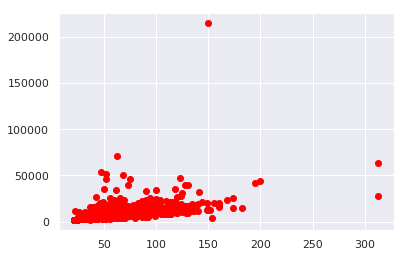

In [46]:
plt.scatter(alldata['LotFrontage'],alldata['LotArea'],color = 'red')

In [47]:
x = alldata.loc[alldata['LotFrontage'].notnull(),'LotArea']
# print(x)
y = alldata.loc[alldata['LotFrontage'].notnull(),'LotFrontage']
# print(y)
t = (x <= 25000) & (y <= 150)
# print(x[t])
# print(y[t])
p = np.polyfit(x,y,1)
alldata.loc[alldata['LotFrontage'].isnull(),'LotFrontage'] = np.polyval(p,alldata.loc[alldata['LotFrontage'].isnull(), 'LotArea'])

#### 7. 其他缺失值

In [48]:
#数值型数据
alldata['KitchenQual'].value_counts()
alldata['KitchenQual'] = alldata['KitchenQual'].fillna(alldata['KitchenQual'].mode()[0])
alldata['Exterior1st'] = alldata['Exterior1st'].fillna(alldata['Exterior1st'].mode()[0])
alldata['Exterior2nd'] = alldata['Exterior1st'].fillna(alldata['Exterior2nd'].mode()[0])
alldata['Functional'] = alldata['Functional'].fillna(alldata['Functional'].mode()[0])
alldata['SaleType'] = alldata['SaleType'].fillna(alldata['SaleType'].mode()[0])
alldata['Utilities'] = alldata['Utilities'].fillna(alldata['Utilities'].mode()[0])

#标称型数据
alldata[["Fence", "MiscFeature"]] = alldata[["Fence", "MiscFeature"]].fillna('None')
alldata['FireplaceQu'] = alldata['FireplaceQu'].fillna('None')
alldata['Alley'] = alldata['Alley'].fillna('None')


In [49]:
# 至此还有GarageYrBlt有空值
alldata.isnull().sum()[alldata.isnull().sum()>0]

GarageYrBlt    159
dtype: int64

In [50]:
alldata['GarageYrBlt'].sort_values()
# alldata['GarageYrBlt'].max()

2217    1895.0
1602    1896.0
2772    1900.0
93      1900.0
2757    1900.0
2250    1900.0
1530    1900.0
1856    1900.0
653     1906.0
848     1908.0
809     1910.0
2087    1910.0
2473    1910.0
1559    1910.0
246     1910.0
2218    1910.0
2788    1910.0
2127    1910.0
2872    1910.0
740     1910.0
735     1914.0
1235    1914.0
1830    1915.0
482     1915.0
2089    1915.0
74      1915.0
1837    1915.0
1833    1915.0
1551    1915.0
187     1916.0
         ...  
2399       NaN
2422       NaN
2426       NaN
2552       NaN
2553       NaN
2557       NaN
2575       NaN
2576       NaN
2579       NaN
2603       NaN
2609       NaN
2691       NaN
2693       NaN
2708       NaN
2767       NaN
2771       NaN
2789       NaN
2791       NaN
2799       NaN
2859       NaN
2862       NaN
2870       NaN
2888       NaN
2891       NaN
2892       NaN
2893       NaN
2909       NaN
2913       NaN
2914       NaN
2917       NaN
Name: GarageYrBlt, Length: 2919, dtype: float64

In [51]:
year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))
# print(year_map)
# 将年份对应映射
alldata.GarageYrBlt = alldata.GarageYrBlt.map(year_map)
print(alldata.GarageYrBlt)
alldata['GarageYrBlt']= alldata['GarageYrBlt'].fillna('None')# 必须 离散化之后再对应映射

0       YearGroup7
1       YearGroup6
2       YearGroup7
3       YearGroup7
4       YearGroup7
5       YearGroup7
6       YearGroup7
7       YearGroup6
8       YearGroup4
9       YearGroup4
10      YearGroup5
11      YearGroup7
12      YearGroup5
13      YearGroup7
14      YearGroup5
15      YearGroup7
16      YearGroup5
17      YearGroup5
18      YearGroup7
19      YearGroup5
20      YearGroup7
21      YearGroup3
22      YearGroup7
23      YearGroup6
24      YearGroup5
25      YearGroup7
26      YearGroup7
27      YearGroup7
28      YearGroup5
29      YearGroup3
           ...    
2889    YearGroup3
2890    YearGroup5
2891           NaN
2892           NaN
2893           NaN
2894    YearGroup7
2895    YearGroup7
2896    YearGroup6
2897    YearGroup6
2898    YearGroup7
2899    YearGroup6
2900    YearGroup5
2901    YearGroup7
2902    YearGroup7
2903    YearGroup7
2904    YearGroup5
2905    YearGroup7
2906    YearGroup6
2907    YearGroup5
2908    YearGroup5
2909           NaN
2910    Year

In [52]:
alldata.isnull().sum()[alldata.isnull().sum()>0]

Series([], dtype: int64)

### 2.1.2 异常值处理

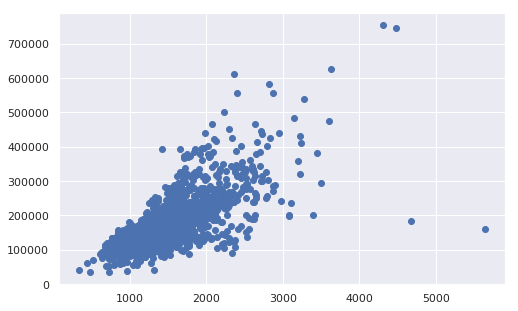

In [53]:
plt.figure(figsize = (8,5))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.show()

In [54]:
outliers_id = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index
print(outliers_id)
alldata = alldata.drop(outliers_id)
# train = train.drop(outliers_id)

Int64Index([523, 1298], dtype='int64')


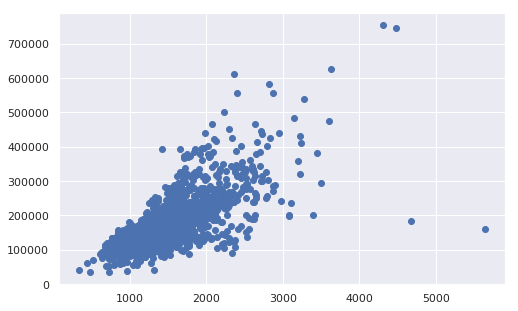

In [55]:
plt.figure(figsize = (8,5))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.show()

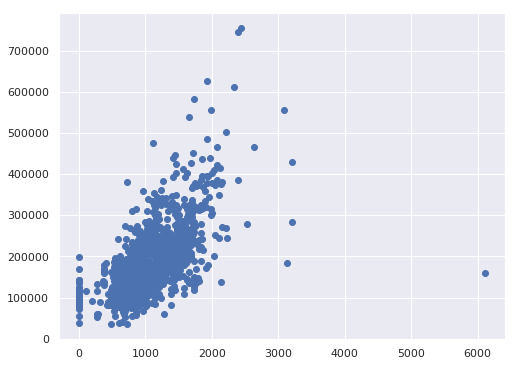

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(train.TotalBsmtSF,train.SalePrice)
plt.show()

In [57]:
y = train['SalePrice'].drop(outliers_id)
train_now = pd.concat([alldata.iloc[:1458,:],y],axis=1)
test_now = alldata.iloc[1458:,:]

In [58]:
# 保存清洗后的数据
train_now.to_csv('train_afterclean.csv')
test_now.to_csv('test_afterclean.csv')

## 2.2 数据变换

In [59]:
train = pd.read_csv('train_afterclean.csv')
test = pd.read_csv('test_afterclean.csv')
# alldata = pd.concat((train.loc[:,'MSSubClass':'SalePrice'],test.loc[:,'MSSubClass':'SaleCondition']),ignore_index = True)

alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']),ignore_index = True)
alldata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


### 2.2.1 对于标称型数据
- 属性构造

- (1). 对于序列型属性

In [60]:
ordinalList = ['ExterQual', 'ExterCond', 'GarageQual', 'GarageCond','PoolQC',\
              'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual','BsmtCond']
ordinalmap = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}
for i in ordinalList:
    alldata[i] = alldata[i].map(ordinalmap)
# alldata.ExterQual.unique()

In [72]:
MasVnrType_Any = alldata.MasVnrType.replace({'BrkCmn': 1,'BrkFace': 1,'CBlock': 1,'Stone': 1,'None': 0})
# MasVnrType_Any.columns = 'MasVy'
print(MasVnrType_Any.name)
print('-------------------------')
print(MasVnrType_Any)


MasVnrType
-------------------------
0       1
1       0
2       1
3       0
4       1
5       0
6       1
7       1
8       0
9       0
10      0
11      1
12      0
13      1
14      1
15      0
16      1
17      0
18      0
19      0
20      1
21      0
22      1
23      0
24      0
25      1
26      0
27      1
28      0
29      0
       ..
2887    0
2888    1
2889    0
2890    0
2891    0
2892    1
2893    1
2894    0
2895    0
2896    0
2897    1
2898    0
2899    0
2900    1
2901    1
2902    0
2903    1
2904    0
2905    0
2906    0
2907    0
2908    0
2909    1
2910    0
2911    0
2912    0
2913    0
2914    0
2915    0
2916    1
Name: MasVnrType, Length: 2917, dtype: int64


In [62]:
alldata = alldata.replace({'CentralAir': {'Y': 1,'N': 0}})
alldata.OverallQual

0       7
1       6
2       7
3       7
4       8
5       5
6       8
7       7
8       7
9       5
10      5
11      9
12      5
13      7
14      6
15      7
16      6
17      4
18      5
19      5
20      8
21      7
22      8
23      5
24      5
25      8
26      5
27      8
28      5
29      4
       ..
2887    4
2888    6
2889    3
2890    5
2891    3
2892    8
2893    8
2894    6
2895    6
2896    8
2897    6
2898    6
2899    6
2900    8
2901    9
2902    1
2903    7
2904    5
2905    5
2906    5
2907    4
2908    4
2909    5
2910    4
2911    4
2912    4
2913    4
2914    5
2915    5
2916    7
Name: OverallQual, Length: 2917, dtype: int64

In [63]:
# def func(data,feature)
#     ordering = pd.DataFrame()
#     ordering['val'] = data[feature].unique()
#     ordering.index = ordering.val
#     ordering['price_mean'] = data.groupby(feature)['SalePrice'].mean()
#     ordering = ordering.sort_values('price_mean')
#     ordering['order'] = range(0, ordering.shape[0])
#     ordering = ordering['order'].to_dict()
#     print(ordering)
#     # ordering.items()
#     for attr_v, score in ordering.items(): 
#             # e.g. qualitative[2]: {'Grvl': 1, 'MISSING': 3, 'Pave': 2}
#             data.loc[train[feature] == attr_v,feature] = score
# feature_list = ['BsmtExposure','BsmtFinType1','BsmtFinType2','Functional','GarageFinish',\
#                 'Fence','MasVnrType','SaleCondition','CentralAir','PavedDrive','MSSubClass']
# for i in feature_list:
#     func(alldata,i)




In [64]:
alldata.KitchenQual.value_counts()

3    1493
4    1151
5     203
2      70
Name: KitchenQual, dtype: int64